In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysolar.radiation as psr

from mpl_toolkits.mplot3d import Axes3D

Visualize the solar vectors for the whole 6th June (from sunrise to sunset) for a point on the earth's surface defined by:
* latitude = 45º (northern hemisphere)
* longitude = 60 (to the east of the Greenwich Prime Meridian)

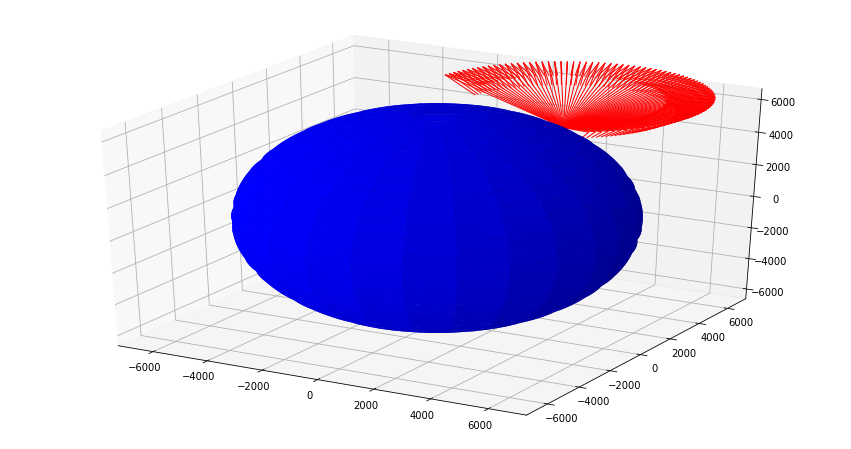

In [2]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# plots a blue sphere representing the earth
R = 6378  # [km] earth's radius
u, v = np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100)
x, y, z = R * np.outer(np.cos(u), np.sin(v)), \
          R * np.outer(np.sin(u), np.sin(v)), \
          R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='blue', rcount=25, ccount=25)

# plots the solar vector each 10 minutes
n = psr.day_of_the_year(6, 6)  # June 6
latitude = 45
longitude = 60

for hour in range(24):
    for minute in (0, 10, 20, 30, 40, 50):
        n_sun_NED = psr.solar_vector_NED(n, latitude, hour, minute)
        n_sun_ecef = psr.ned2ecef(n_sun_NED, latitude, longitude)

        X, Y, Z = psr.lla2ecef(latitude, longitude, 0) / 1e3
        U, V, W = 5e3 * n_sun_ecef
        ax.quiver(X, Y, Z, U, V, W, linewidths=1, color='red')

plt.show()

Visualize the solar vectors at 16.10UTC on the 5th April for all points on the earth's surface defined by:
* longitude = -30º (to the west of the Greenwich Prime Meridian)

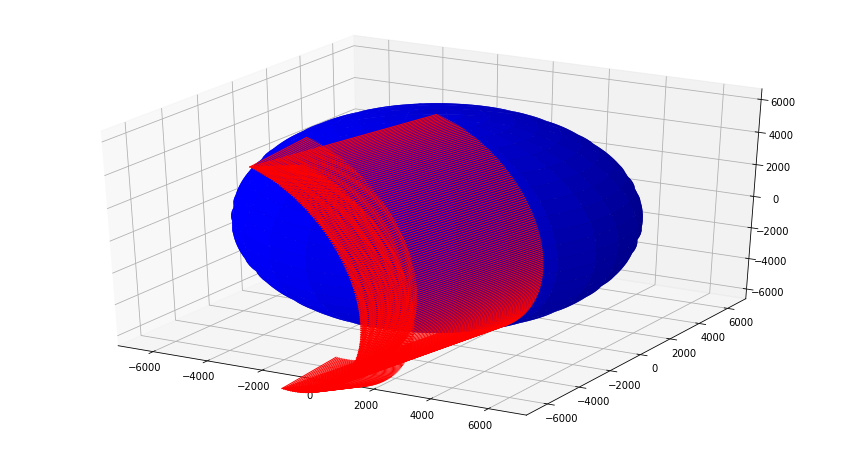

In [3]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# plots a blue sphere representing the earth
R = 6378  # [km] earth's radius
u, v = np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100)
x, y, z = R * np.outer(np.cos(u), np.sin(v)), \
          R * np.outer(np.sin(u), np.sin(v)), \
          R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='blue', rcount=25, ccount=25)

# plots the solar vectors
n = psr.day_of_the_year(4, 5)  # April 5
long = 330

for lat in range(-90, 91):   
    n_sun_NED = psr.solar_vector_NED(n, lat, 16, 10)
    n_sun_ECEF = psr.ned2ecef(n_sun_NED, lat, long)

    X, Y, Z = psr.lla2ecef(lat, long, 0) / 1e3  # coordinates in km
    U, V, W = 1e4 * n_sun_ECEF
    ax.quiver(X, Y, Z, U, V, W, color='r', linewidths=1)

plt.show()